# Models of Neurons II

In [2]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

plt.rcParams["figure.figsize"] = (15, 7)
plt.rc('xtick',labelsize=20)
plt.rc('ytick',labelsize=20)

title_fontsize = 36
ax_fontsize = 28
label_fontsize = 20

Cm = 100e-12    # in F
gl = 10e-9      # in S
El = -70e-3     # in V
taum = Cm/gl    # in s
Vth = -50e-3    # in V
Vreset = -80e-3 # in V

## Refractory period

In [3]:
def ref_LIF_neuron(t,dt,I,V0,tauref):
    # Numerical simulation of a LIF neuron with clamped refractory period
    N = int(t/dt)+1
    V = V0*np.ones(N)
    t0 = -tauref
    for i in range(1,N):
        if i*dt < t0+tauref:
            V[i] = Vreset
        else:
            updt_V = -(V[i-1] - El)/taum + I[i]/Cm
            V[i] = V[i-1] + dt*updt_V
            if V[i] > Vth:
                V[i] = Vreset
                t0 = i*dt
    return V

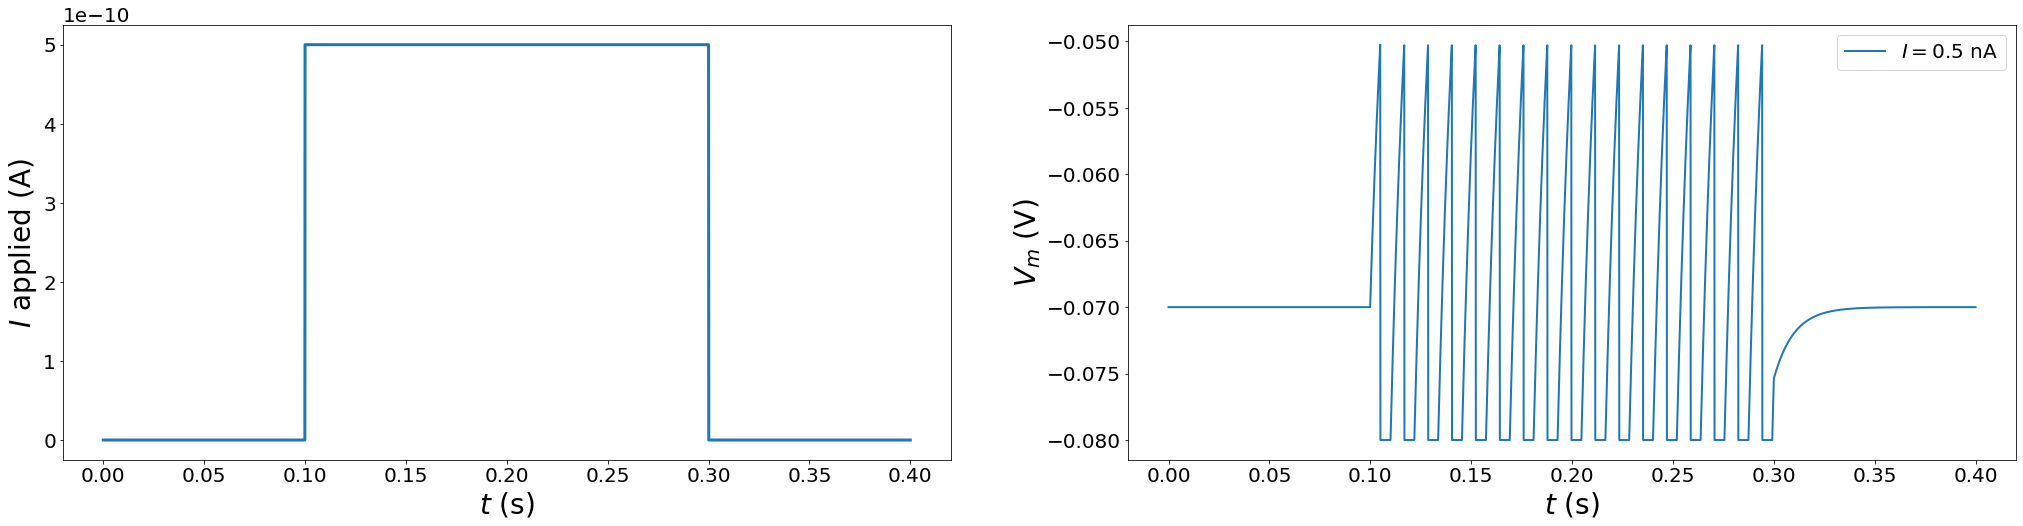

In [4]:
V0 = -70e-3
tauref = .005 # in s
dt = .0001
t = .4
time_abs = np.linspace(0,t,int(t/dt)+1)

def step_I(I0, time_abs=time_abs, t_min=.1, t_max=.3):
    I = I0*np.ones(int(t/dt)+1)
    I[time_abs<t_min] = 0
    I[time_abs>t_max] = 0
    return I

fig, axes = plt.subplots(1,2,figsize=(35,8))

# I0s = [.18e-9]
# I0s = [.21e-9]
# I0s = [.25e-9]
I0s = [.5e-9]
# I0s = [.18e-9, .21e-9, .25e-9]
for I0 in I0s:
    I = step_I(I0=I0)
    V = ref_LIF_neuron(t,dt,I,V0,tauref)
    axes[0].plot(time_abs,I,lw=3)
    axes[0].set_xlabel(r"$t$ (s)", fontsize=ax_fontsize)
    axes[0].set_ylabel(r"$I$ applied (A)", fontsize=ax_fontsize)
    axes[1].plot(time_abs,V,lw=2,label=r"$I = "+str(I0*1e9)+"$ nA")
    axes[1].set_xlabel(r"$t$ (s)", fontsize=ax_fontsize)
    axes[1].set_ylabel(r"$V_m$ (V)", fontsize=ax_fontsize)
    axes[1].legend(fontsize=label_fontsize)
plt.show()

### Refractory conductance

In [15]:
dg = 2000e-9     # Increase in potassium conductance 
EK = -80e-3     # Potassium reversal potential

def ref_cdtc_LIF_neuron(t,dt,I,V0,tauref):
    # Numerical simulation of a LIF neuron with refractory potassium conductance
    N = int(t/dt)+1
    V = V0*np.ones(N)
    t0 = -tauref
    gK = 0
    for i in range(1,N):
        updt_gK = -gK/tauref
        gK += dt*updt_gK
        updt_V = -(V[i-1] - El)/taum + I[i]/Cm - gK*(V[i-1] - EK)/Cm
        V[i] = V[i-1] + dt*updt_V
        if V[i] > Vth:
            gK += dg
    return V

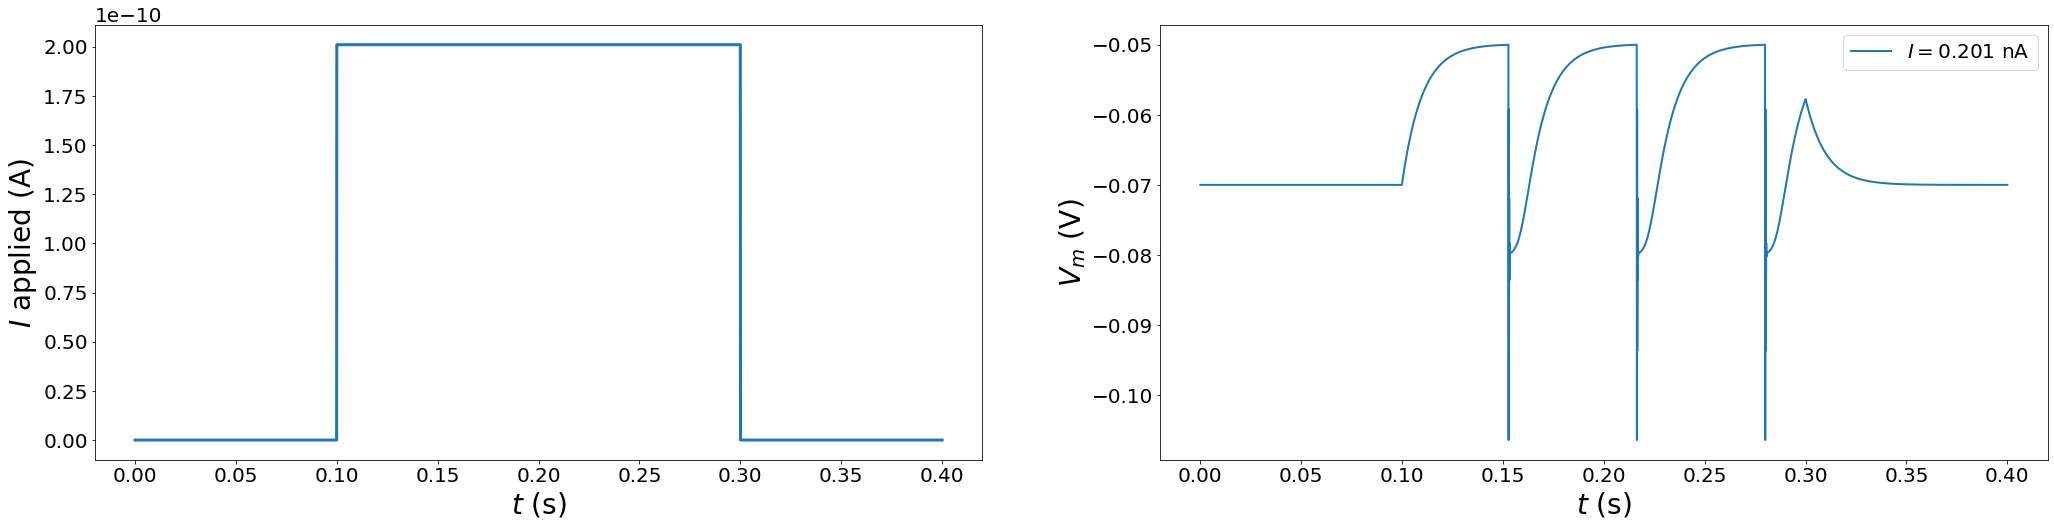

In [16]:
V0 = -70e-3
tauref = .005 # in s
dt = .0001
t = .4
time_abs = np.linspace(0,t,int(t/dt)+1)

# I0s = [.18e-9]
I0s = [.201e-9]
# I0s = [.25e-9]
# I0s = [.5e-9]
# I0s = [.18e-9, .21e-9, .25e-9]

fig, axes = plt.subplots(1,2,figsize=(35,8))
for I0 in I0s:
    I = step_I(I0=I0)
    
    eff_tauref = tauref/3     # The time to have an exponential reach 95% of its asymptotic value is 3*tau
    V = ref_cdtc_LIF_neuron(t,dt,I,V0,eff_tauref)
    axes[0].plot(time_abs,I,lw=3)
    axes[1].plot(time_abs,V,lw=2,label=r"$I = "+str(I0*1e9)+"$ nA")
    
    V = ref_LIF_neuron(t,dt,I,V0,tauref)
#     axes[1].plot(time_abs,V,lw=2,label=r"$I = "+str(I0*1e9)+"$ nA")
    
    axes[0].set_xlabel(r"$t$ (s)", fontsize=ax_fontsize)
    axes[0].set_ylabel(r"$I$ applied (A)", fontsize=ax_fontsize)
    axes[1].set_xlabel(r"$t$ (s)", fontsize=ax_fontsize)
    axes[1].set_ylabel(r"$V_m$ (V)", fontsize=ax_fontsize)
    axes[1].legend(fontsize=label_fontsize)
plt.show()

## Raised threshold

In [48]:
dVth = 1

def raised_th_LIF_neuron(t,dt,I,V0,tauref):
    # Numerical simulation of a LIF neuron with raised threshold
    N = int(t/dt)+1
    V = V0*np.ones(N)
    t0 = -tauref
    Vtht = Vth
    for i in range(1,N):
        updt_Vth = -(Vtht - Vth)/tauref
        Vtht += dt*updt_Vth
        updt_V = -(V[i-1] - El)/taum + I[i]/Cm
        V[i] = V[i-1] + dt*updt_V
        if V[i] > Vtht:
            V[i] = Vreset
            Vtht += dVth
    return V

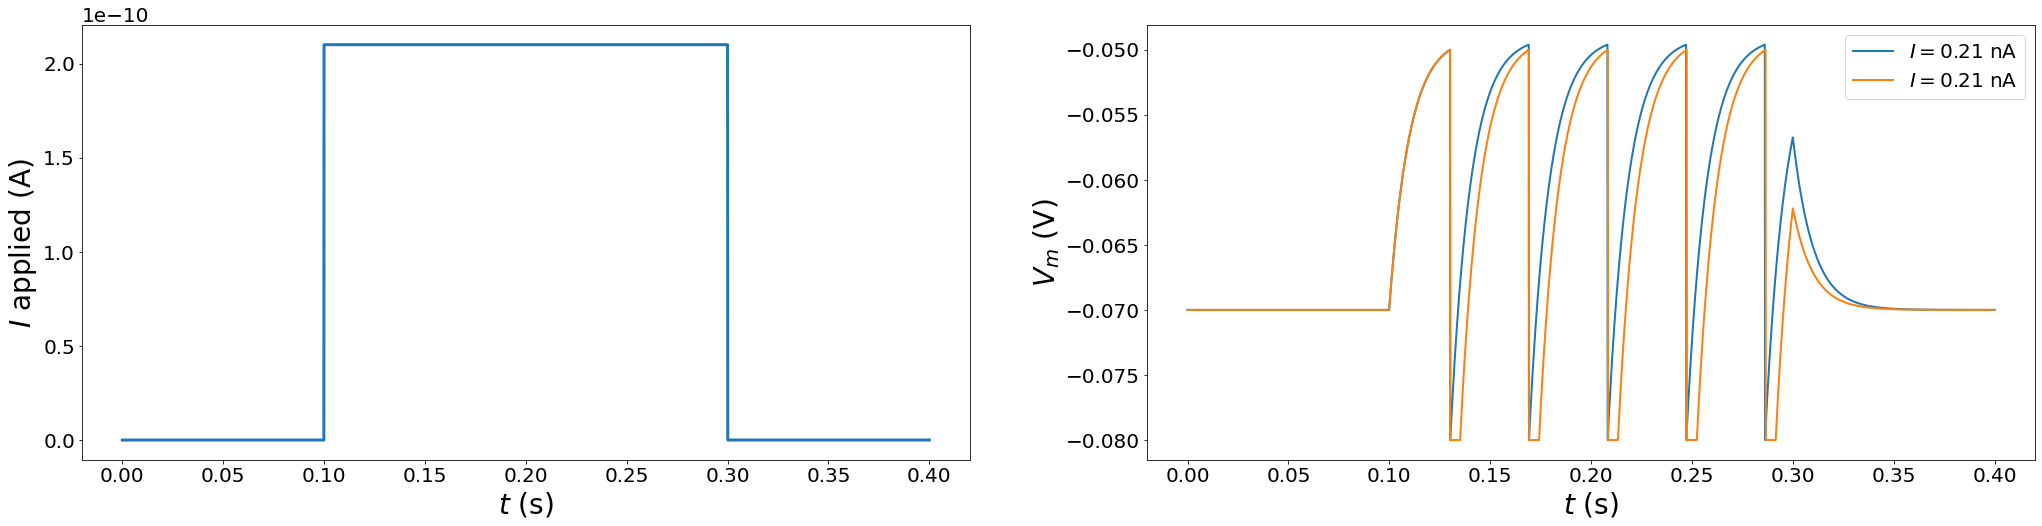

In [49]:
V0 = -70e-3
tauref = .005 # in s
dt = .0001
t = .4
time_abs = np.linspace(0,t,int(t/dt)+1)

# I0s = [.18e-9]
I0s = [.21e-9]
# I0s = [.25e-9]
# I0s = [.5e-9]
# I0s = [.18e-9, .21e-9, .25e-9]

fig, axes = plt.subplots(1,2,figsize=(35,8))
for I0 in I0s:
    I = step_I(I0=I0)
    
    eff_tauref = tauref     # The time to have an exponential reach 95% of its asymptotic value is 3*tau
    V = raised_th_LIF_neuron(t,dt,I,V0,eff_tauref)
    axes[0].plot(time_abs,I,lw=3)
    axes[1].plot(time_abs,V,lw=2,label=r"$I = "+str(I0*1e9)+"$ nA")
    
    V = ref_LIF_neuron(t,dt,I,V0,tauref)
    axes[1].plot(time_abs,V,lw=2,label=r"$I = "+str(I0*1e9)+"$ nA")
    
    axes[0].set_xlabel(r"$t$ (s)", fontsize=ax_fontsize)
    axes[0].set_ylabel(r"$I$ applied (A)", fontsize=ax_fontsize)
    axes[1].set_xlabel(r"$t$ (s)", fontsize=ax_fontsize)
    axes[1].set_ylabel(r"$V_m$ (V)", fontsize=ax_fontsize)
    axes[1].legend(fontsize=label_fontsize)
plt.show()